In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv("./results.csv")

In [4]:
data.describe()

,How old are you?,How would you rate your proficiency with computers?,I think that I would like to use this system frequently,I found the system unnecessarily complex,I thought the system was easy to use,I think that I would need the support of a technical person to be able to use this system,I found the various functions in this system were well integrated,I thought the was too much inconsistency in this system,I would imagine that most people would learn to use this system very quickly,I found the system cumbersome to use,...,I think that I would like to use this system frequently.3,I found the system unnecessarily complex.3,I thought the system was easy to use.3,I think that I would need the support of a technical person to be able to use this system.3,I found the various functions in this system were well integrated.3,I thought the was too much inconsistency in this system.3,I would imagine that most people would learn to use this system very quickly.3,I found the system cumbersome to use.3,I felt very confident using the system.3,I needed to learn a lot of things before I could get going with this system.3
count,13.000000,13.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000
mean,24.153846,4.076923,4.000000,2.0,3.428571,1.142857,3.714286,2.285714,3.571429,2.428571,...,3.500000,3.500000,2.833333,2.000000,3.500000,3.500000,3.00000,3.666667,3.000000,3.000000
std,11.119399,1.115164,0.816497,1.0,1.133893,0.377964,0.951190,1.112697,0.975900,0.975900,...,1.378405,1.516575,1.329160,1.264911,1.516575,1.760682,1.67332,1.505545,1.264911,0.894427
min,17.000000,1.000000,3.000000,1.0,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000
25%,19.000000,4.000000,3.500000,1.5,2.500000,1.000000,3.500000,1.500000,3.000000,2.000000,...,3.250000,3.000000,2.250000,1.000000,3.000000,2.250000,2.00000,3.250000,2.000000,2.250000
50%,20.000000,4.000000,4.000000,2.0,4.000000,1.000000,4.000000,2.000000,4.000000,2.000000,...,4.000000,3.500000,3.000000,1.500000,3.500000,4.000000,2.50000,4.000000,2.500000,3.000000
75%,21.000000,5.000000,4.500000,2.0,4.000000,1.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,4.750000,3.000000,2.750000,4.750000,5.000000,4.50000,4.750000,3.750000,3.750000
max,50.000000,5.000000,5.000000,4.0,5.000000,2.000000,5.000000,4.000000,5.000000,4.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000


In [76]:
data_renamed = data.rename(columns={
    "Timestamp": "time",
    "How old are you?": "age",
    "How would you rate your proficiency with computers?": "computer_proficiency",
    "Are you a native English speaker?": "native_english",
    "On what device will you be partaking in this evaluation?": "device",
    "Have you used the iPlayer before?": "used_iplayer_before",
    "Have you used My5 before?": "used_my5_before",
    "Please tick all tasks that you managed to complete successfully": "iplayer_completed_tasks",
    "I think that I would like to use this system frequently": "iplayer_q1",
    "I found the system unnecessarily complex": "iplayer_q2",
    "I thought the system was easy to use": "iplayer_q3",
    "I think that I would need the support of a technical person to be able to use this system": "iplayer_q4",
    "I found the various functions in this system were well integrated": "iplayer_q5",
    "I thought the was too much inconsistency in this system": "iplayer_q6",
    "I would imagine that most people would learn to use this system very quickly": "iplayer_q7",
    "I found the system cumbersome to use": "iplayer_q8",
    "I felt very confident using the system": "iplayer_q9",
    "I needed to learn a lot of things before I could get going with this system": "iplayer_q10",
    "Please tick all tasks that you managed to complete successfully.1": "my5_completed_tasks",
    "I think that I would like to use this system frequently.1": "my5_q1",
    "I found the system unnecessarily complex.1": "my5_q2",
    "I thought the system was easy to use.1": "my5_q3",
    "I think that I would need the support of a technical person to be able to use this system.1": "my5_q4",
    "I found the various functions in this system were well integrated.1": "my5_q5",
    "I thought the was too much inconsistency in this system.1": "my5_q6",
    "I would imagine that most people would learn to use this system very quickly.1": "my5_q7",
    "I found the system cumbersome to use.1": "my5_q8",
    "I felt very confident using the system.1": "my5_q9",
    "I needed to learn a lot of things before I could get going with this system.1": "my5_q10",
    "Please tick all tasks that you managed to complete successfully.2": "my5_completed_tasks_2",
    "I think that I would like to use this system frequently.2": "my5_q1_2",
    "I found the system unnecessarily complex.2": "my5_q2_2",
    "I thought the system was easy to use.2": "my5_q3_2",
    "I think that I would need the support of a technical person to be able to use this system.2": "my5_q4_2",
    "I found the various functions in this system were well integrated.2": "my5_q5_2",
    "I thought the was too much inconsistency in this system.2": "my5_q6_2",
    "I would imagine that most people would learn to use this system very quickly.2": "my5_q7_2",
    "I found the system cumbersome to use.2": "my5_q8_2",
    "I felt very confident using the system.2": "my5_q9_2",
    "I needed to learn a lot of things before I could get going with this system.2": "my5_q10_2",
    "Please tick all tasks that you managed to complete successfully.3": "iplayer_completed_tasks_2",
    "I think that I would like to use this system frequently.3": "iplayer_q1_2",
    "I found the system unnecessarily complex.3": "iplayer_q2_2",
    "I thought the system was easy to use.3": "iplayer_q3_2",
    "I think that I would need the support of a technical person to be able to use this system.3": "iplayer_q4_2",
    "I found the various functions in this system were well integrated.3": "iplayer_q5_2",
    "I thought the was too much inconsistency in this system.3": "iplayer_q6_2",
    "I would imagine that most people would learn to use this system very quickly.3": "iplayer_q7_2",
    "I found the system cumbersome to use.3": "iplayer_q8_2",
    "I felt very confident using the system.3": "iplayer_q9_2",
    "I needed to learn a lot of things before I could get going with this system.3": "iplayer_q10_2",
})

In [77]:
data_renamed["used_iplayer_before"] = data_renamed["used_iplayer_before"] == "Yes"
data_renamed["used_my5_before"] = data_renamed["used_my5_before"] == "Yes"
data_renamed["iplayer_completed_tasks"] = data_renamed["iplayer_completed_tasks"]\
  .combine(data_renamed["iplayer_completed_tasks_2"], lambda a, b: a if isinstance(b, float) and np.isnan(b) else b) \
  .map(lambda s: s.split(";"))
data_renamed["iplayer_q1"] = data_renamed["iplayer_q1"].combine(data_renamed["iplayer_q1_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q2"] = data_renamed["iplayer_q2"].combine(data_renamed["iplayer_q2_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q3"] = data_renamed["iplayer_q3"].combine(data_renamed["iplayer_q3_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q4"] = data_renamed["iplayer_q4"].combine(data_renamed["iplayer_q4_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q5"] = data_renamed["iplayer_q5"].combine(data_renamed["iplayer_q5_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q6"] = data_renamed["iplayer_q6"].combine(data_renamed["iplayer_q6_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q7"] = data_renamed["iplayer_q7"].combine(data_renamed["iplayer_q7_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q8"] = data_renamed["iplayer_q8"].combine(data_renamed["iplayer_q8_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q9"] = data_renamed["iplayer_q9"].combine(data_renamed["iplayer_q9_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["iplayer_q10"] = data_renamed["iplayer_q10"].combine(data_renamed["iplayer_q10_2"], lambda a, b: a if np.isnan(b) else b)
del data_renamed["iplayer_completed_tasks_2"]
del data_renamed["iplayer_q1_2"]
del data_renamed["iplayer_q2_2"]
del data_renamed["iplayer_q3_2"]
del data_renamed["iplayer_q4_2"]
del data_renamed["iplayer_q5_2"]
del data_renamed["iplayer_q6_2"]
del data_renamed["iplayer_q7_2"]
del data_renamed["iplayer_q8_2"]
del data_renamed["iplayer_q9_2"]
del data_renamed["iplayer_q10_2"]
data_renamed["my5_completed_tasks"] = data_renamed["my5_completed_tasks"]\
  .combine(data_renamed["my5_completed_tasks_2"], lambda a, b: a if isinstance(b, float) and np.isnan(b) else b) \
  .map(lambda s: s.split(";"))
data_renamed["my5_q1"] = data_renamed["my5_q1"].combine(data_renamed["my5_q1_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q2"] = data_renamed["my5_q2"].combine(data_renamed["my5_q2_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q3"] = data_renamed["my5_q3"].combine(data_renamed["my5_q3_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q4"] = data_renamed["my5_q4"].combine(data_renamed["my5_q4_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q5"] = data_renamed["my5_q5"].combine(data_renamed["my5_q5_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q6"] = data_renamed["my5_q6"].combine(data_renamed["my5_q6_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q7"] = data_renamed["my5_q7"].combine(data_renamed["my5_q7_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q8"] = data_renamed["my5_q8"].combine(data_renamed["my5_q8_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q9"] = data_renamed["my5_q9"].combine(data_renamed["my5_q9_2"], lambda a, b: a if np.isnan(b) else b)
data_renamed["my5_q10"] = data_renamed["my5_q10"].combine(data_renamed["my5_q10_2"], lambda a, b: a if np.isnan(b) else b)
del data_renamed["my5_completed_tasks_2"]
del data_renamed["my5_q1_2"]
del data_renamed["my5_q2_2"]
del data_renamed["my5_q3_2"]
del data_renamed["my5_q4_2"]
del data_renamed["my5_q5_2"]
del data_renamed["my5_q6_2"]
del data_renamed["my5_q7_2"]
del data_renamed["my5_q8_2"]
del data_renamed["my5_q9_2"]
del data_renamed["my5_q10_2"]

In [121]:
data_renamed["iplayer_q1"] = data_renamed["iplayer_q1"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q2"] = data_renamed["iplayer_q2"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q3"] = data_renamed["iplayer_q3"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q4"] = data_renamed["iplayer_q4"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q5"] = data_renamed["iplayer_q5"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q6"] = data_renamed["iplayer_q6"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q7"] = data_renamed["iplayer_q7"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q8"] = data_renamed["iplayer_q8"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q9"] = data_renamed["iplayer_q9"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["iplayer_q10"] = data_renamed["iplayer_q10"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q1"] = data_renamed["my5_q1"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q2"] = data_renamed["my5_q2"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q3"] = data_renamed["my5_q3"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q4"] = data_renamed["my5_q4"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q5"] = data_renamed["my5_q5"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q6"] = data_renamed["my5_q6"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q7"] = data_renamed["my5_q7"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q8"] = data_renamed["my5_q8"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q9"] = data_renamed["my5_q9"].map(lambda a: 3 if np.isnan(a) else a)
data_renamed["my5_q10"] = data_renamed["my5_q10"].map(lambda a: 3 if np.isnan(a) else a)

In [81]:
data_renamed["used_iplayer_before"].value_counts(True)

True     0.769231
False    0.230769
Name: used_iplayer_before, dtype: float64

In [80]:
data_renamed["used_my5_before"].value_counts(True)

False    0.538462
True     0.461538
Name: used_my5_before, dtype: float64

In [79]:
data_renamed["device"].map(lambda s: s.strip().lower()).map({"mobile phone": "Phone", "phone": "Phone", "laptop": "Laptop", "macbook air": "Laptop", "desktop pc": "Desktop", "iphone 11": "Phone"}).value_counts(True)

Phone      0.461538
Laptop     0.384615
Desktop    0.153846
Name: device, dtype: float64

In [78]:
data_renamed.columns

Index(['time', 'age', 'native_english', 'computer_proficiency', 'device',
       'used_iplayer_before', 'used_my5_before', 'iplayer_completed_tasks',
       'iplayer_q1', 'iplayer_q2', 'iplayer_q3', 'iplayer_q4', 'iplayer_q5',
       'iplayer_q6', 'iplayer_q7', 'iplayer_q8', 'iplayer_q9', 'iplayer_q10',
       'my5_completed_tasks', 'my5_q1', 'my5_q2', 'my5_q3', 'my5_q4', 'my5_q5',
       'my5_q6', 'my5_q7', 'my5_q8', 'my5_q9', 'my5_q10'],
      dtype='object')

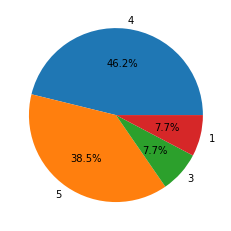

In [96]:
data_renamed["computer_proficiency"].value_counts().plot.pie(ylabel="", autopct='%1.1f%%')
plt.savefig('./plots/proficiency.png') 

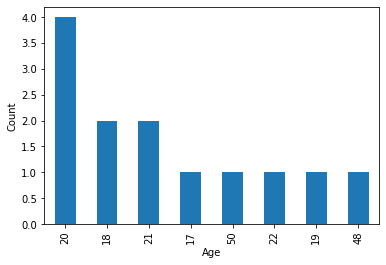

In [101]:
data_renamed["age"].value_counts().plot.bar(ylabel="Count", xlabel="Age")
plt.savefig('./plots/age.png') 

In [123]:
data_renamed["iplayer_sus"] = ((data_renamed["iplayer_q1"] - 1) + \
                              (5 - data_renamed["iplayer_q2"]) + \
                              (data_renamed["iplayer_q3"] - 1) + \
                              (5 - data_renamed["iplayer_q4"]) + \
                              (data_renamed["iplayer_q5"] - 1) + \
                              (5 - data_renamed["iplayer_q6"]) + \
                              (data_renamed["iplayer_q7"] - 1) + \
                              (5 - data_renamed["iplayer_q8"]) + \
                              (data_renamed["iplayer_q9"] - 1) + \
                              (5 - data_renamed["iplayer_q10"])) * 2.5
data_renamed["my5_sus"] = ((data_renamed["my5_q1"] - 1) + \
                              (5 - data_renamed["my5_q2"]) + \
                              (data_renamed["my5_q3"] - 1) + \
                              (5 - data_renamed["my5_q4"]) + \
                              (data_renamed["my5_q5"] - 1) + \
                              (5 - data_renamed["my5_q6"]) + \
                              (data_renamed["my5_q7"] - 1) + \
                              (5 - data_renamed["my5_q8"]) + \
                              (data_renamed["my5_q9"] - 1) + \
                              (5 - data_renamed["my5_q10"])) * 2.5

In [131]:
data_renamed["iplayer_sus"].describe()

count    13.000000
mean     63.653846
std      25.302655
min       7.500000
25%      47.500000
50%      70.000000
75%      80.000000
max      97.500000
Name: iplayer_sus, dtype: float64

In [157]:
data_renamed["my5_sus"].describe()

count     13.000000
mean      74.423077
std       17.741014
min       45.000000
25%       57.500000
50%       82.500000
75%       87.500000
max      100.000000
Name: my5_sus, dtype: float64

In [132]:
data_renamed.groupby("used_iplayer_before")["iplayer_sus"].describe()

,count,mean,std,min,25%,50%,75%,max
used_iplayer_before,,,,,,,,
False,3.0,35.833333,28.759057,7.5,21.25,35.0,50.00,65.0
True,10.0,72.000000,18.287822,47.5,55.00,75.0,83.75,97.5


In [156]:
data_renamed.groupby("used_my5_before")["my5_sus"].describe()

,count,mean,std,min,25%,50%,75%,max
used_my5_before,,,,,,,,
False,7.0,71.428571,18.419710,45.0,60.0,70.0,82.500,100.0
True,6.0,77.916667,17.917636,52.5,65.0,87.5,89.375,92.5


In [134]:
data_renamed.groupby("native_english")["iplayer_sus"].describe()

,count,mean,std,min,25%,50%,75%,max
native_english,,,,,,,,
No,2.0,72.500000,10.606602,65.0,68.75,72.5,76.25,80.0
Yes,11.0,62.045455,27.175775,7.5,47.50,70.0,80.00,97.5


In [135]:
data_renamed.groupby("native_english")["my5_sus"].describe()

,count,mean,std,min,25%,50%,75%,max
native_english,,,,,,,,
No,2.0,93.750000,8.838835,87.5,90.625,93.75,96.875,100.0
Yes,11.0,70.909091,16.780671,45.0,57.500,70.00,85.000,92.5


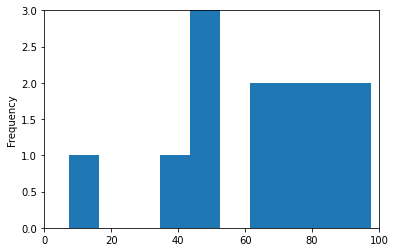

In [143]:
data_renamed["iplayer_sus"].plot.hist(xlim=(0, 100), ylim=(0,3))
plt.savefig('./plots/iplayer-sus.png') 

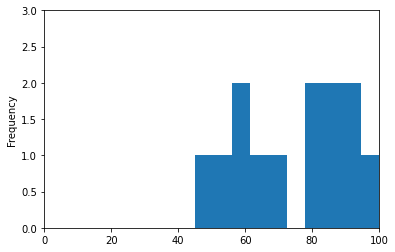

In [144]:
data_renamed["my5_sus"].plot.hist(xlim=(0, 100), ylim=(0,3))
plt.savefig('./plots/my5-sus.png') 

In [147]:
stats.ttest_rel(data_renamed["my5_sus"], data_renamed["iplayer_sus"])

Ttest_relResult(statistic=1.5670850893837365, pvalue=0.1430730435245634)

In [154]:
stats.f_oneway(data_renamed[data_renamed["used_iplayer_before"] == True]["iplayer_sus"], data_renamed[data_renamed["used_iplayer_before"] == False]["iplayer_sus"])

F_onewayResult(statistic=7.118909855554485, pvalue=0.021866971718707336)

In [155]:
stats.f_oneway(data_renamed[data_renamed["used_my5_before"] == True]["iplayer_sus"], data_renamed[data_renamed["used_my5_before"] == False]["my5_sus"])

F_onewayResult(statistic=0.1395525859517064, pvalue=0.7158259007903081)